In [355]:
import sys
sys.path.append('../')
import pystan
import stan_utility
import arviz as az
import scipy.stats as stats
import pandas as pd

In [356]:
import matplotlib.pyplot as plt
import os
import seaborn as sn
import numpy as np
import seaborn as sns
import scipy as sp
from scipy.stats import invgamma

In [372]:
import matplotlib.pyplot as plt
import matplotlib as mpl

light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
light_grey="#DDDDDD"
blue="#0000FF"

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200

In [465]:
#Exercise 1 - Gamma family distribution

In [468]:
"""""
Gamma family distributions. These distributions are defined for positive real numbers. Provide histograms of Gamma and invGamma distributions. See how tail behavior of those distributions behave. Using albebra_solver (see notebook from lecture on poisson distribution modelling) find parameters for Gamma and invGamma for which 98% probability is for values between 5 and 10. Sample for those distributions and compare histograms.
"""""


'""\nGamma family distributions. These distributions are defined for positive real numbers. Provide histograms of Gamma and invGamma distributions. See how tail behavior of those distributions behave. Using albebra_solver (see notebook from lecture on poisson distribution modelling) find parameters for Gamma and invGamma for which 98% probability is for values between 5 and 10. Sample for those distributions and compare histograms.\n'

In [374]:
with open('gamma_stan.stan', 'r') as file:
    print(file.read())

data {
  real alpha;
  real beta;
}


generated quantities {
    real gamma = gamma_rng(alpha,beta);
    real inv_gamma = inv_gamma_rng(alpha,beta);
}



In [375]:
model_gamma=stan_utility.compile_model('gamma_stan.stan')

Using cached StanModel


In [376]:
R=1000
sim_uf=model_gamma.sampling(data={'alpha':5, 'beta':4},
                            algorithm="Fixed_param",
                            iter=R,
                            warmup=0,
                            chains=1, 
                            seed=29042020)

Text(4, 0.25, 'Prior')

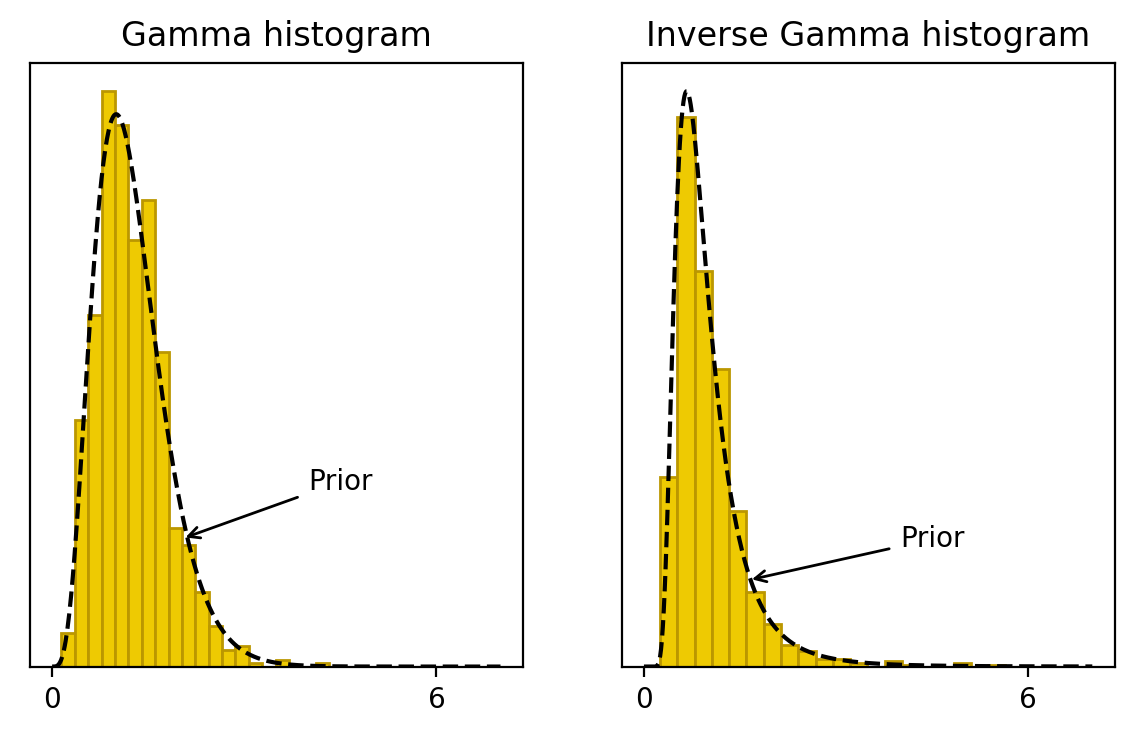

In [377]:
params=sim_uf.extract()
gamma=params['gamma']
inv_gamma=params['inv_gamma']

fig, axes = plt.subplots(1, 2,figsize=(7, 4))
ax1=axes[0]
ax1.hist(gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,7,500)
ax1.set_xticks([0,6])
ax1.set_yticks([])
ax1.set_title(r'Gamma histogram')
ax1.plot(x,stats.gamma.pdf(x,a=5,scale=(1/4)),color='black',linestyle='--')
ax1.annotate('Prior',xy=(2,0.18),xytext=(4,0.25),arrowprops={'arrowstyle':'->'})
ax2=axes[1]
ax2.hist(inv_gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x2=np.linspace(0,7,500)
ax2.set_xticks([0,6])
ax2.set_yticks([])
ax2.set_title(r'Inverse Gamma histogram')
ax2.plot(x,stats.invgamma.pdf(x2,a=5,scale=4),color='black',linestyle='--')
ax2.annotate('Prior',xy=(1.6,0.18),xytext=(4,0.25),arrowprops={'arrowstyle':'->'})

In [378]:
with open('gamma_stan_5_10.stan', 'r') as file:
    print(file.read())

functions {
  vector tail_delta(vector y, vector theta, real[] x_r, int[] x_i) {
    vector[3] deltas;
    deltas[1] = gamma_cdf(theta[1], y[1], y[2]) - y[3];
    deltas[2] = gamma_cdf(theta[2], y[1], y[2]) - (y[3] + 0.98);
    deltas[3] = y[1]/y[2] -8;


    return deltas;
  }
}


data {
  vector[2] theta;
  vector[3] y_guess;
}

transformed data {
  vector[3] y;
  real x_r[0];
  int x_i[0];
  // Due to RuntimeError, relative tolerance was decrease to 1e-2 and max num_stes was increase do 1e6
  y = algebra_solver(tail_delta, y_guess, theta, x_r, x_i);

   print("alpha = ", y[1]);
   print("beta = ", y[2]);
}

generated quantities {
    real gamma = gamma_rng(y[1],y[2]);
    real inv_gamma = inv_gamma_rng(y[1],y[2]);
    real alpha = y[1];
    real beta = y[2];
}



In [379]:
gamma_model_5_10=stan_utility.compile_model('gamma_stan_5_10.stan')

Using cached StanModel


In [380]:
R=1000
theta = np.array([5, 10])
y_guess = np.array([6,0.8,0.01])
print(y_guess)
data=dict(y_guess=y_guess, theta=theta)
sim_uf=gamma_model_5_10.sampling(data=data,
                            algorithm="Fixed_param",
                            iter=R,
                            warmup=0,
                            chains=1, 
                            seed=1052020)
alpha = np.round(sim_uf.extract()['alpha'][0])
print("Alpha: " + str(alpha))
beta = np.round(sim_uf.extract()['beta'][0])
print("Beta: " + str(beta))

[6.   0.8  0.01]
Alpha: 76.0
Beta: 9.0


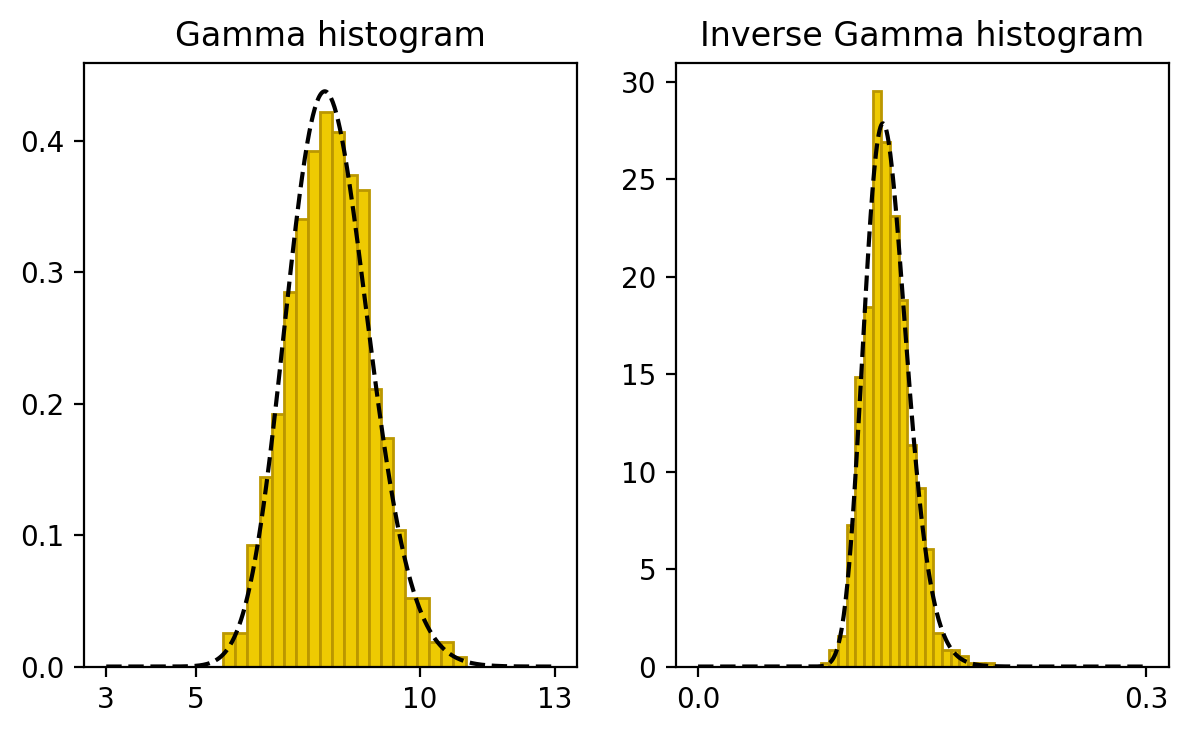

In [381]:
params2=sim_uf.extract()
gamma=params2['gamma']
inv_gamma=params2['inv_gamma']

fig, axes = plt.subplots(1, 2,figsize=(7, 4))
ax1=axes[0]
ax1.hist(gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(3,13,500)

ax1.set_title(r'Gamma histogram')
ax1.plot(x,stats.gamma.pdf(x,a=75.8,scale=(1/9.5)),color='black',linestyle='--')

ax1.annotate('Prior',xy=(2,0.18),xytext=(4,0.25),arrowprops={'arrowstyle':'->'})
ax1.set_xticks([3,5,10,13])
ax2=axes[1]
ax2.hist(inv_gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x2=np.linspace(0,0.3,500)
ax2.set_xticks([0,0.3])
ax2.set_title(r'Inverse Gamma histogram')
ax2.plot(x2,stats.invgamma.pdf(x2,a=75.8,scale=9.5),color='black',linestyle='--')
#ax2.annotate('Prior',xy=(1.6,0.18),xytext=(4,0.25),arrowprops={'arrowstyle':'->'})

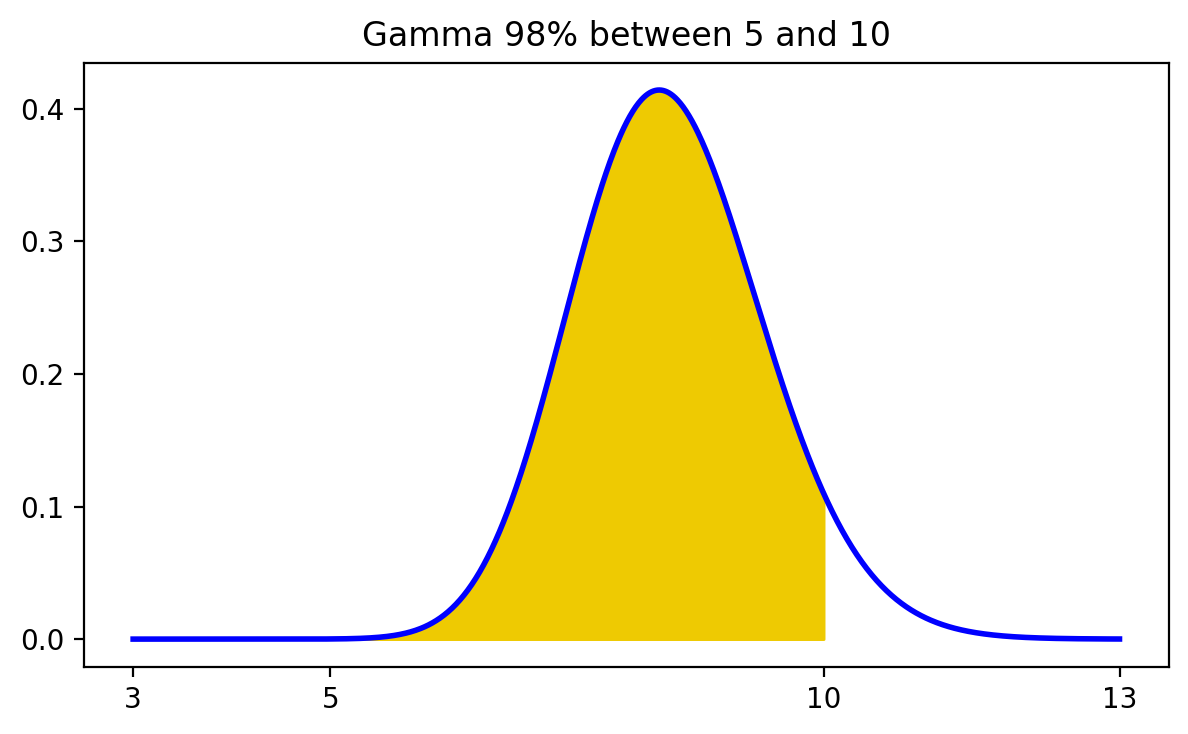

In [383]:
fig, ax2 = plt.subplots(1, 1,figsize=(7, 4))
x2=np.linspace(3,13,1000)
x4=np.linspace(5,10,1000)
ax2.plot(x2,stats.gamma.pdf(x= x2,a= alpha,loc= 0,scale= 1/beta),color=blue,linewidth=2)
ax2.fill_between(x4,stats.gamma.pdf(x= x4,a= alpha,loc= 0,scale= 1/beta),0,color=dark)
#ax2.set_yticks([])
ax2.set_xticks([3,5,10,13])
ax2.set_title(r'Gamma 98% between 5 and 10')
plt.show()

In [384]:
with open('inv_gamma_stan_5_10.stan', 'r') as file:
    print(file.read())

functions {
  vector tail_delta(vector y, vector theta, real[] x_r, int[] x_i) {
    vector[3] deltas;
    deltas[1] = inv_gamma_cdf(theta[1], y[1], y[2]) - y[3];
    deltas[2] = inv_gamma_cdf(theta[2], y[1], y[2]) - (y[3] + 0.98);
    deltas[3] = y[2]/(y[1] -1)-10;


    return deltas;
  }
}


data {
  vector[2] theta;
  vector[3] y_guess;
}

transformed data {
  vector[3] y;
  real x_r[0];
  int x_i[0];
  // Due to RuntimeError, relative tolerance was decrease to 1e-2 and max num_stes was increase do 1e6
  y = algebra_solver(tail_delta, y_guess, theta, x_r, x_i, 1e-10,1.2e-2,1e6);

   print("alpha = ", y[1]);
   print("beta = ", y[2]);
}

generated quantities {
    real gamma = gamma_rng(y[1],y[2]);
    real inv_gamma = inv_gamma_rng(y[1],y[2]);
    real alpha = y[1];
    real beta = y[2];
}



In [385]:
inv_gamma_5_10_model=stan_utility.compile_model('inv_gamma_stan_5_10.stan')

Using cached StanModel


In [388]:
R=1000
theta = np.array([5, 10])
y_guess = np.array([2,10,0.0001])
print(y_guess)
data=dict(y_guess=y_guess, theta=theta)
sim_uf=inv_gamma_5_10_model.sampling(data=data,
                            algorithm="Fixed_param",
                            iter=R,
                            warmup=0,
                            chains=1, 
                            seed=29042020)
alpha = np.round(sim_uf.extract()['alpha'][0])
print("Alpha: " + str(alpha))
beta = np.round(sim_uf.extract()['beta'][0])
print("Beta: " + str(beta))



"""""
The parameters that we were searching for could not be found
"""""

[2.e+00 1.e+01 1.e-04]


RuntimeError: Exception: algebra_solver: the norm of the algebraic function is: 0.287452 but should be lower than the function tolerance: 0.012. Consider decreasing the relative tolerance and increasing the max_num_steps.  (in 'unknown file name' at line 24)


In [469]:
#Exercise 2 - Negative binomial distribution
"""""
Negative binomial distribution can be used in order to relax the constraints of equal mean and variance of Poissson distribution. Using both concentration and dispersion parametrization sample from negative binomial with fixed mean and see how it behaves in comparison to the Poisson with the same mean.
"""""
with open('negative_binomial_stan.stan', 'r') as file:
    print(file.read())

data {
  real alpha;
  real mean1; // We cannot use key word 'mean'
  real phi;
}


generated quantities {

    real neg_bin_con = neg_binomial_rng(alpha, alpha/mean1);
    real neg_bin_dis = neg_binomial_2_rng(mean1, phi);

    real poisson_con = poisson_rng(neg_bin_con);
    real poisson_dis = poisson_rng(neg_bin_dis);

}



In [390]:
model=stan_utility.compile_model('negative_binomial_stan.stan')


Using cached StanModel


In [391]:
alpha = 10
mean = 9
beta = alpha/mean
phi = 0.1

In [392]:
R=1000
data=dict(alpha=alpha, mean1=mean, phi=phi)
sim_uf=model.sampling(data=data,
                                    algorithm="Fixed_param", 
                                    iter=R, 
                                    warmup=0, 
                                    chains=1, 
                                    refresh=R,
                                    seed=29042020)

In [393]:
params=sim_uf.extract()
neg_bin_con=params['neg_bin_con']
poisson_con=params['poisson_con']
neg_bin_dis=params['neg_bin_dis']
poisson_dis=params['poisson_dis']

In [394]:
x_con=np.linspace(0, 80, 81)
x_dis=np.linspace(0, 45, 46)
nbinom_fun_con = stats.nbinom(alpha, beta/(beta+1))
nbinom_fun_dis = stats.nbinom(phi, phi/(mean+phi))

nbinom_pmf_con = []
nbinom_pmf_dis = []

for i in range(0, len(x_con)):
    nbinom_pmf_con.append( nbinom_fun_con.pmf( x_con[i] ))
for i in range(0, len(x_dis)):
    nbinom_pmf_dis.append( nbinom_fun_dis.pmf( x_dis[i] ))

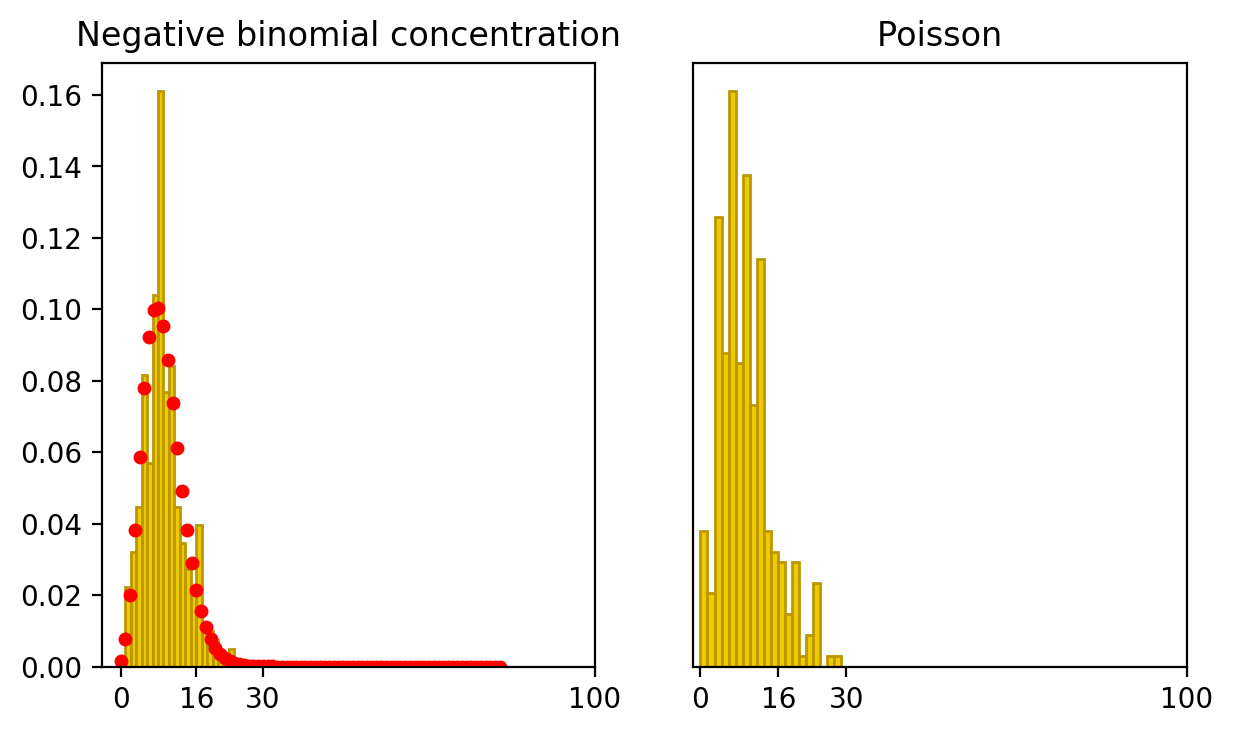

In [395]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(neg_bin_con,bins=20, color=dark, edgecolor=dark_highlight, density=True)
ax1.plot(x_con, nbinom_pmf_con,  'ro', markersize=4)
ax1.set_xticks([0,16,30,100])
#ax1.set_yticks([])
ax1.set_title(r'Negative binomial concentration')

ax2=axes[1]
ax2.hist(poisson_con,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax2.set_yticks([])
ax2.set_xticks([0,16,30,100])
ax2.set_title('Poisson')

plt.show()

In [470]:
#Exercise 3 - Student-t family distribution
"""""
Student-t distributions can be considered generalizations of Gaussian distributions with varying scale. Use both degrees of freedom and dispersion parametrizations to see how changing parameters moves from normal distribution. Take a special case of degrees of freedom equal to 1, as this is Cauchy distribution. See how mean and variance behave while you increase number of samples.
"""""

with open('student_t_stan.stan', 'r') as file:
    print(file.read())

data {
  real degrees;
  real mu;
  real sigma;
}


generated quantities {
    real student = student_t_rng(degrees, mu,sigma);
}



In [397]:
model=stan_utility.compile_model('student_t_stan.stan')


Using cached StanModel


In [398]:
degrees=1
mu=0
sigma=3
data = dict(degrees=degrees1, mu=mu1, sigma=sigma1)
R1=20
sim_nm1=model.sampling(data=data,
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

R2=50
sim_nm2=model.sampling(data=data,
                      algorithm="Fixed_param", 
                      iter=R2, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
params1=sim_nm1.extract()
student1=params1['student']

params2=sim_nm2.extract()
student2=params2['student']



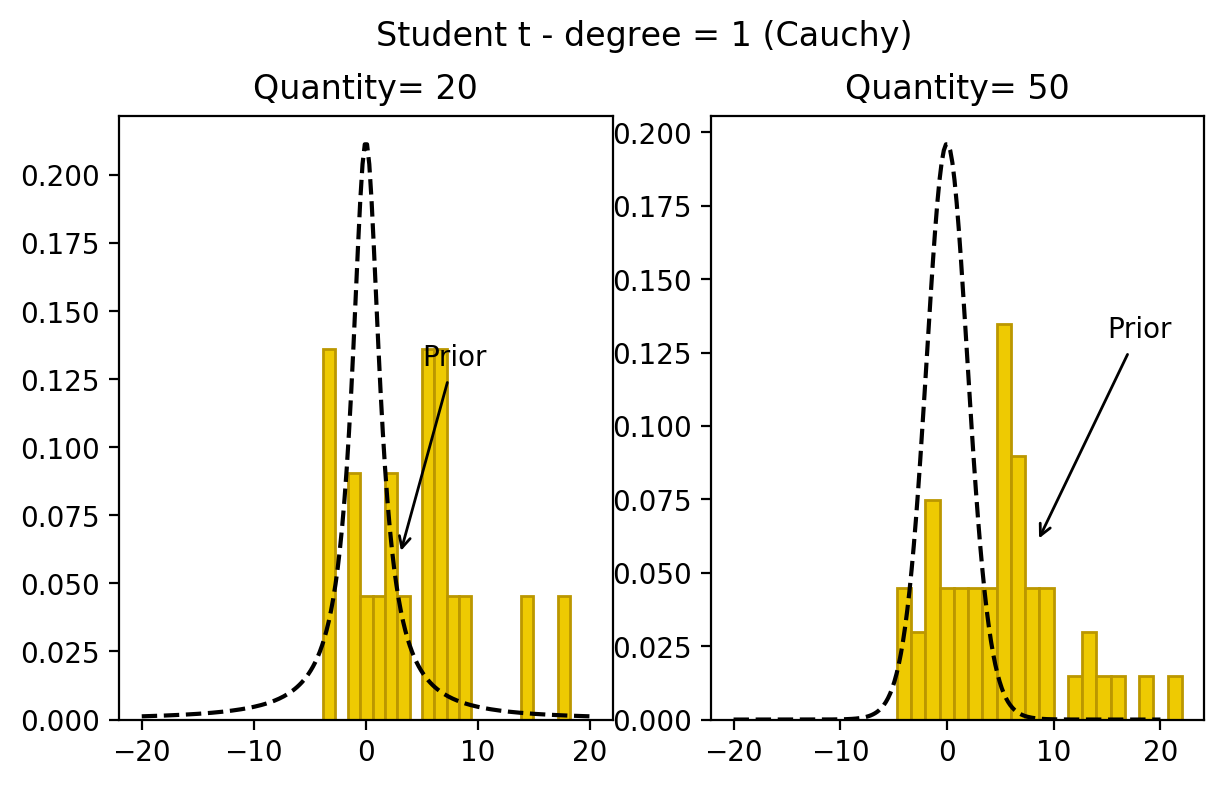

In [399]:
x=np.linspace(-20,20,200)

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

fig.suptitle('Student t - degree = 1 (Cauchy)',x= 0.5,y=1, fontsize=12)

ax1=axes[0]
ax1.hist(student1,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax1.plot(x,stats.t.pdf(x,df=1,loc=0,scale=1.5),color='black',linestyle='--')
ax1.annotate('Prior',xy=(3,0.06),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})
ax1.set_title(r'Quantity= 20')
ax2=axes[1]
ax2.hist(student2,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.plot(x,stats.t.pdf(x,df=15,loc=0,scale=2),color='black',linestyle='--')
ax2.annotate('Prior',xy=(8.4,0.06),xytext=(15,0.13),arrowprops={'arrowstyle':'->'})
ax2.set_title(r'Quantity= 50')

plt.show()

In [400]:
print(r'Median of students in first case is equal:',np.median(student1))
print(r'Median of students in second case is equal:',np.median(student2))

Median of students in first case is equal: 4.41076911049997
Median of students in second case is equal: 4.848535396515519


In [401]:
degrees1=3
mu1=5
sigma1=4
data = dict(degrees=degrees1, mu=mu1, sigma=sigma1)
R1=20
sim_nm1=model.sampling(data=data,
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

R2=50
sim_nm2=model.sampling(data=data,
                      algorithm="Fixed_param", 
                      iter=R2, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
params1=sim_nm1.extract()
student1=params1['student']

params2=sim_nm2.extract()
student2=params2['student']


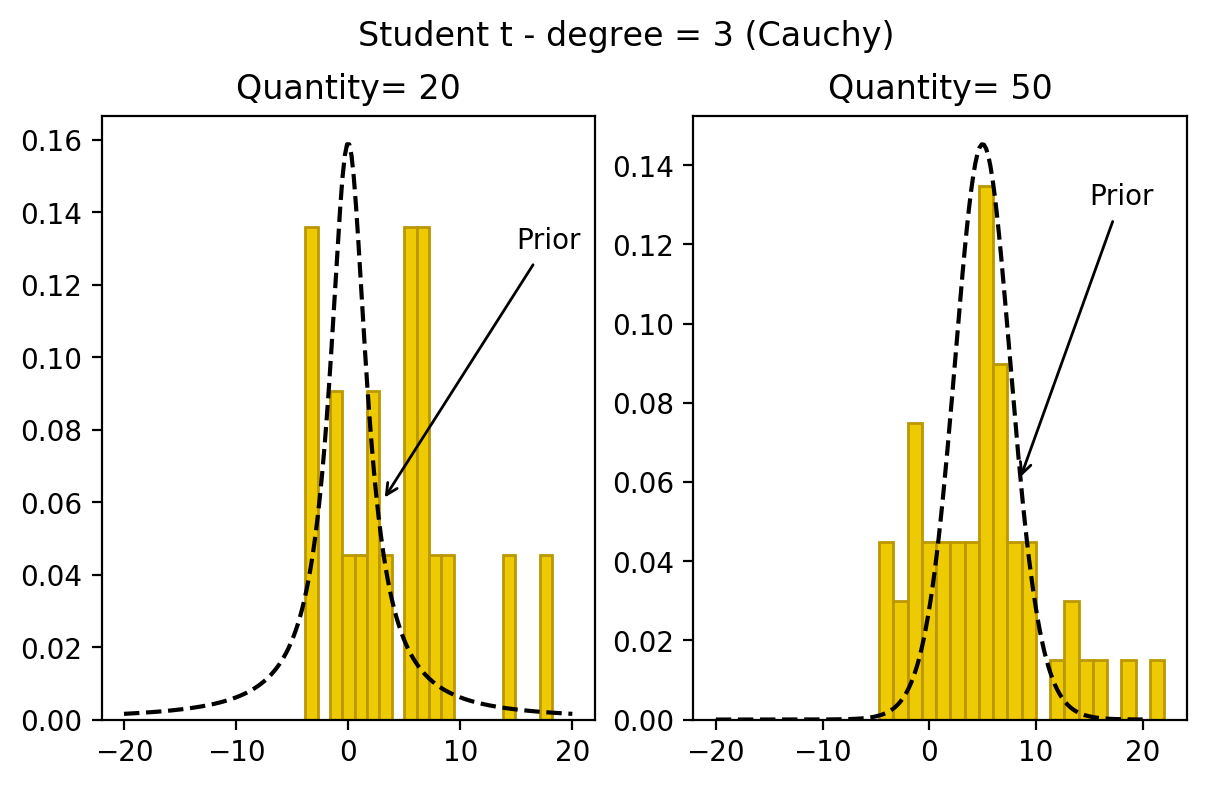

In [402]:
x=np.linspace(-20,20,200)

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

fig.suptitle('Student t - degree = 3 (Cauchy)',x= 0.5,y=1, fontsize=12)

ax1=axes[0]
ax1.hist(student1,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax1.plot(x,stats.t.pdf(x,df=1,loc=0,scale=2),color='black',linestyle='--')
ax1.annotate('Prior',xy=(3,0.06),xytext=(15,0.13),arrowprops={'arrowstyle':'->'})
ax1.set_title(r'Quantity= 20')
ax2=axes[1]
ax2.hist(student2,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.plot(x,stats.t.pdf(x,df=15,loc=5,scale=2.7),color='black',linestyle='--')
ax2.annotate('Prior',xy=(8.4,0.06),xytext=(15,0.13),arrowprops={'arrowstyle':'->'})
ax2.set_title(r'Quantity= 50')

plt.show()

In [403]:
print(r'Median of students in first case is equal:',np.median(student1))
print(r'Median of students in second case is equal:',np.median(student2))

Median of students in first case is equal: 4.41076911049997
Median of students in second case is equal: 4.848535396515519


In [404]:
#Exercise 4 - Multivariate normal distributions

In [ ]:
"""""
Consider density plots and 2d histograms for visualisation of behavior of 2 dimensional Multivariate normal. Use the correlation matrix decompositon of covariance matrix to see how individual variances and correlations infulence the distribution. For 3 and 4 dimensional normal distributions observe the marginals of variables with histograms.
"""""

In [414]:
with open('multi_normal_stan.stan', 'r') as file:
    print(file.read())


data {
    vector[2] mu;
    matrix[2, 2] sigma;
}
generated quantities {
    vector[2] y = multi_normal_rng(mu, sigma);
}



In [415]:
model=stan_utility.compile_model('multi_normal_stan.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_17ea912a710b866a794d791c65b28a1e NOW.


In [416]:
mu = [2, 8]
sigma = [[1, 0.3], [0.3, 2]]

def cov2corr(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

def corr2cov(correlation,SD):
    outer_SD = np.outer(SD, SD)
    covariance = outer_SD*correlation
    return covariance

In [424]:
correlation_matrix= cov2corr(sigma)
covariance_matrix=corr2cov(correlation_matrix,mu)

Text(0.5, 1, 'Histogram in one dimention')

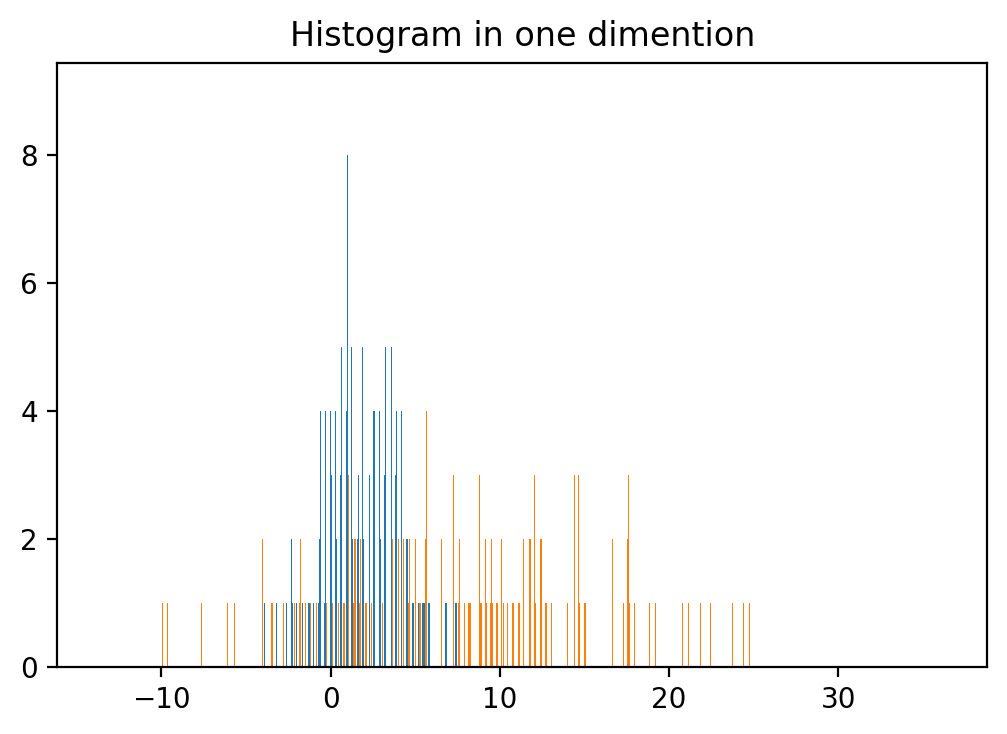

In [431]:
data=dict(mu=mu,sigma=sigma)
R1=1000
sim_uf=model.sampling(data=data,
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

data=dict(mu=mu,sigma=covariance_matrix)
multiNormal_sample=model.sampling(data=data,
                                  algorithm="Fixed_param",                
                                  iter=100,
                                  seed=43541)


params_multiNormal=multiNormal_sample.extract()
multiNormalSamplingHist=plt.hist(params_multiNormal['y'], bins=1000)
plt.title('Histogram in one dimention',x= 0.5,y=1, fontsize=12)


Text(0.5, 1, 'Histogram in two dimentions')

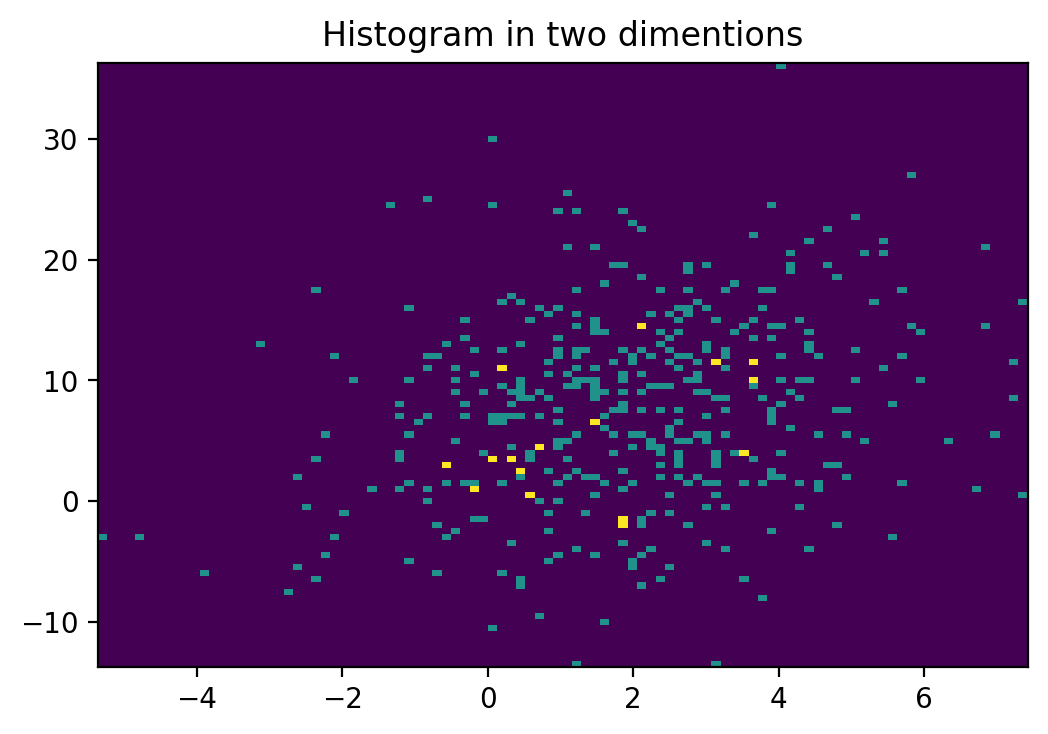

In [432]:
multiNormalSamplingHist=plt.hist2d(params_multiNormal['y'][:,0],params_multiNormal['y'][:,1],bins=100)
plt.title('Histogram in two dimentions',x= 0.5,y=1, fontsize=12)


Text(0.5, 1, 'Marginal Histogram with Seaborn')

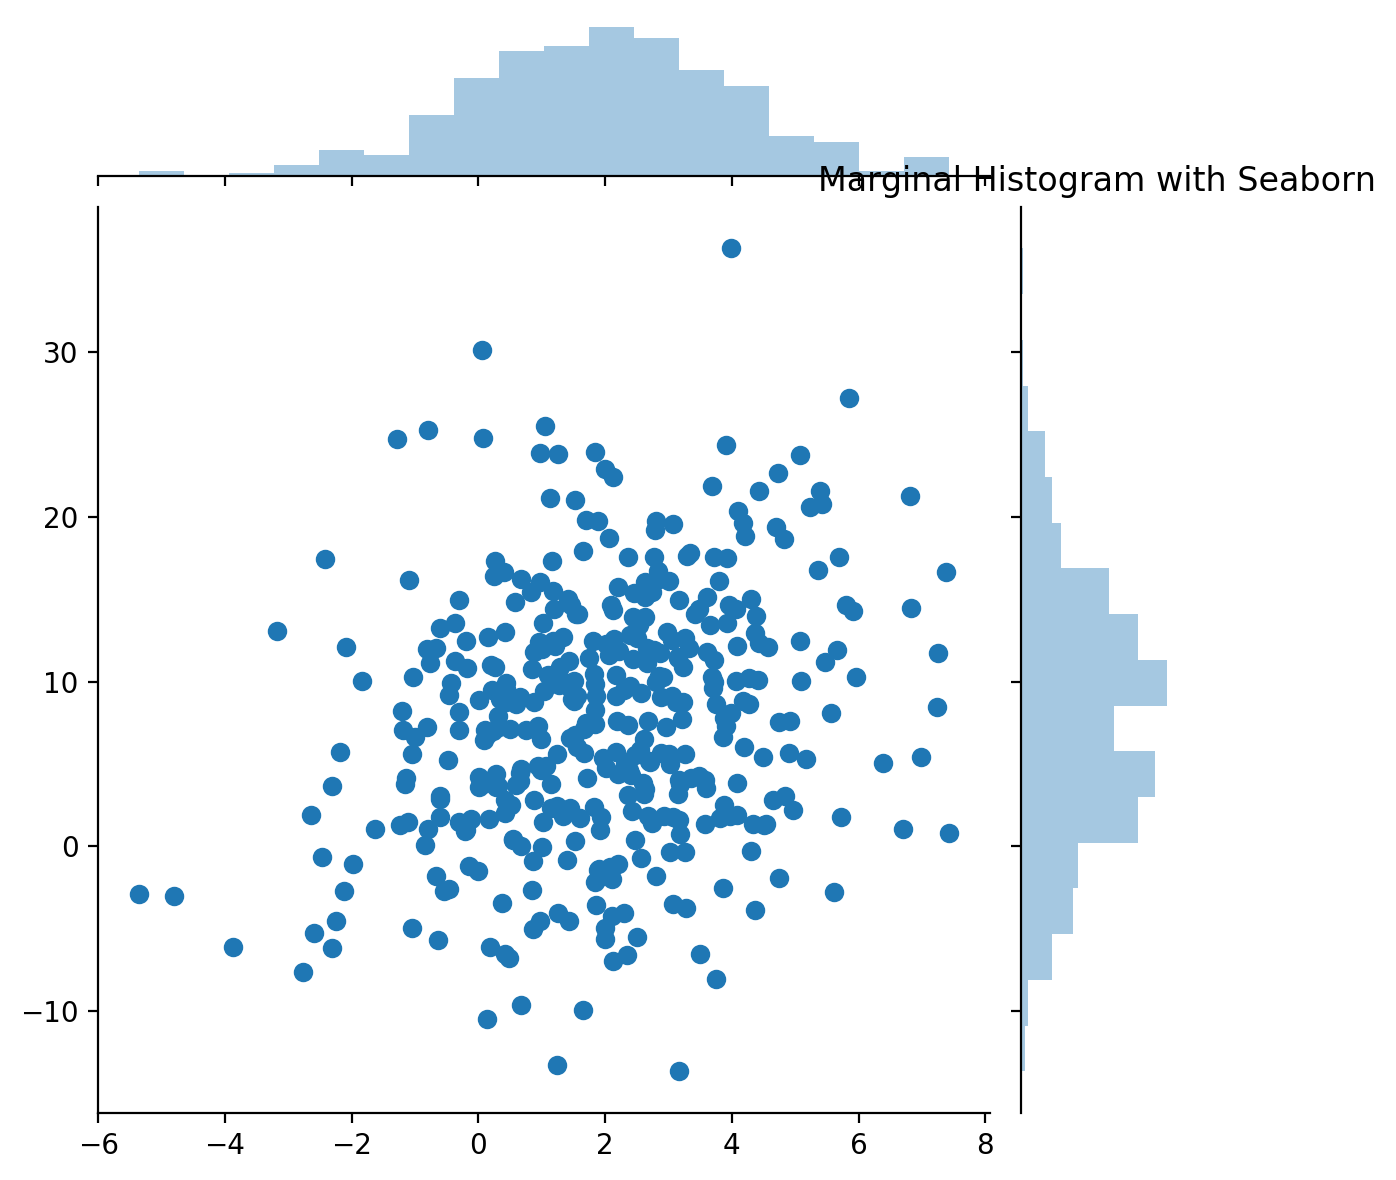

In [434]:
g = sns.jointplot(params_multiNormal['y'][:,0],params_multiNormal['y'][:,1]);
plt.title('Marginal Histogram with Seaborn',x= 0.5,y=1, fontsize=12)


In [441]:
with open('multivariate3_stan.stan', 'r') as file:
    print(file.read())

data {
  vector[3] mu;
  matrix[3,3] sigma;
}


generated quantities {
    vector[3] result = multi_normal_rng(mu,sigma);
}



In [443]:
model=stan_utility.compile_model('multivariate3_stan.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_bddd8da15742fcca398bf945d2fca5e4 NOW.


In [444]:
mu = [0, 5, 10]
sigma = [[1, 0.6, 0.9], [0.6, 1, 0.8],[0.9, 0.8, 1]]

In [455]:
data=dict(mu=mu,sigma=sigma)
R1=100
sim_uf=model.sampling(data=data,
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
params1=sim_uf.extract()
result=params1['result']
result1= [result[i][0] for i in range(0,100)]
result2= [result[i][1] for i in range(0,100)]
result3= [result[i][2] for i in range(0,100)]

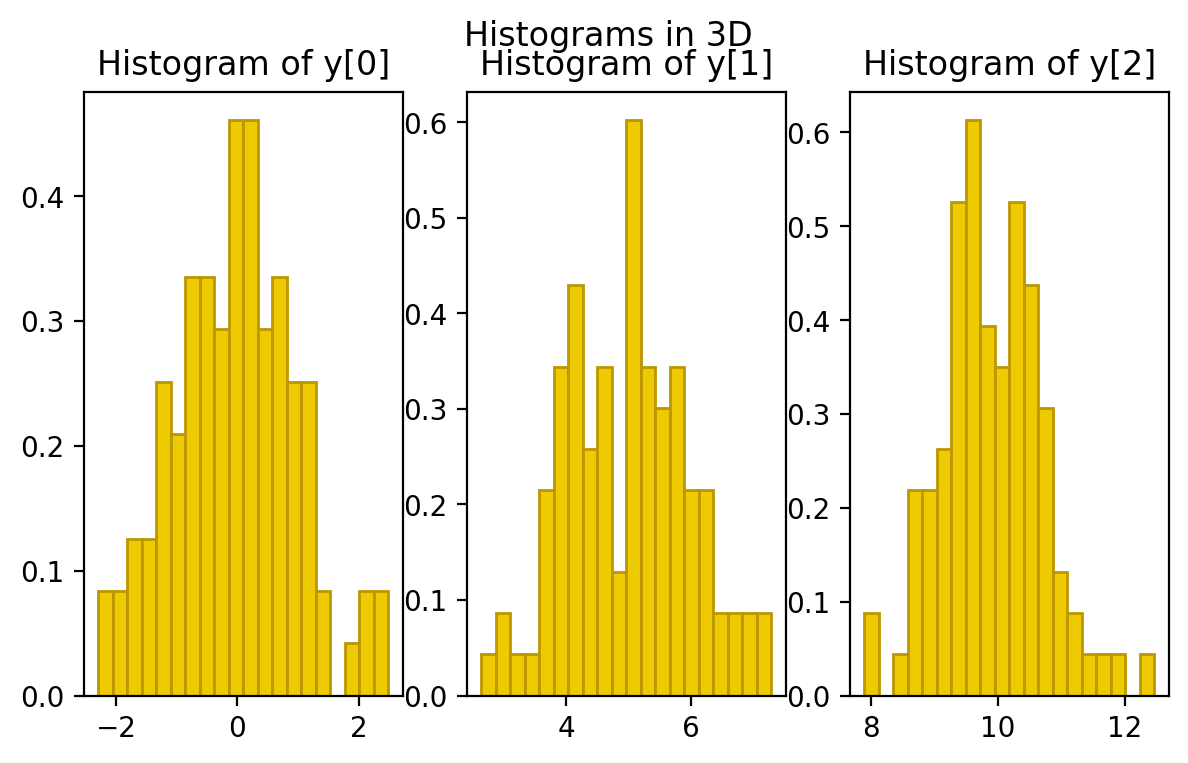

In [473]:
fig, axes = plt.subplots(1, 3, figsize=(7, 4))

fig.suptitle('Histograms in 3D',x= 0.5,y=0.97, fontsize=12)

ax1=axes[0]
ax1.hist(result1,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax1.set_title(r'Histogram of y[0]')

ax2=axes[1]
ax2.hist(result2,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.set_title(r'Histogram of y[1]')

ax2=axes[2]
ax2.hist(result3,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.set_title(r'Histogram of y[2]')

plt.show()

In [457]:
with open('multivariate4_stan.stan', 'r') as file:
    print(file.read())



data {
  vector[4] mu;
  matrix[4,4] sigma;
}


generated quantities {
    vector[4] result = multi_normal_rng(mu,sigma);
}



In [458]:
model=stan_utility.compile_model('multivariate4_stan.stan')


Using cached StanModel


In [459]:
mu = [0, 5, 10, 15]
sigma = [[1, 0.2, 0.3, 0.4], [0.2, 1, 0.5, 0.6],[0.3, 0.5, 1, 0.7], [0.4, 0.6, 0.7, 1]]

In [462]:
data=dict(mu=mu,sigma=sigma)
R1=100
sim_uf=model.sampling(data=data,
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
params1=sim_uf.extract()
result=params1['result']
result1= [result[i][0] for i in range(0,100)]
result2= [result[i][1] for i in range(0,100)]
result3= [result[i][2] for i in range(0,100)]
result4= [result[i][3] for i in range(0,100)]

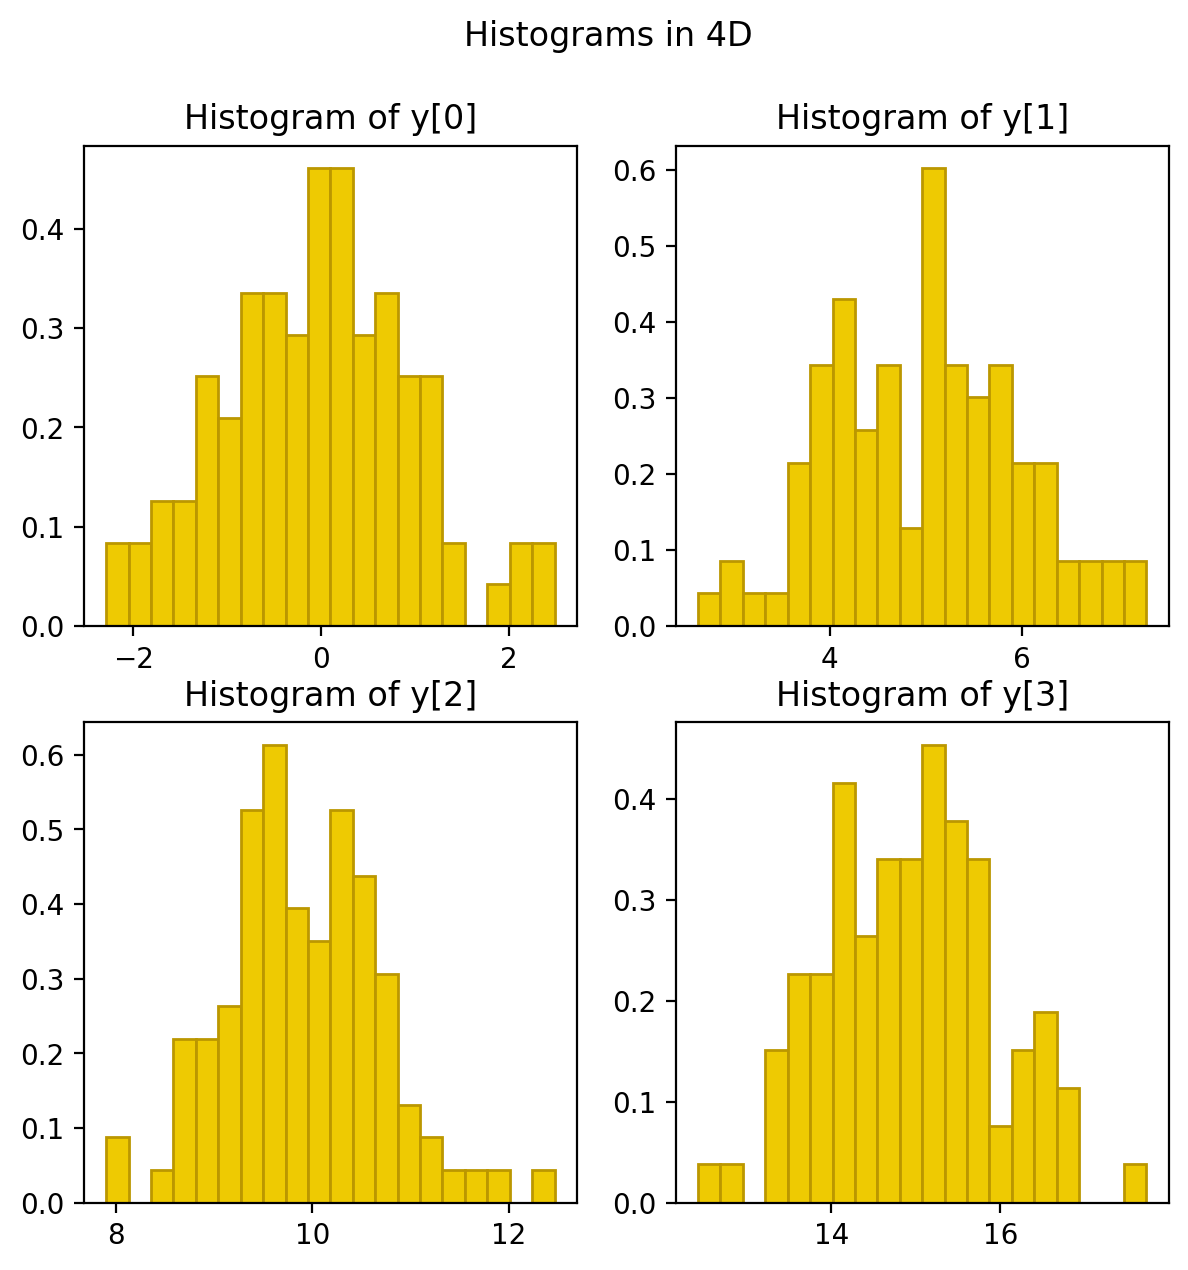

In [474]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

fig.suptitle('Histograms in 4D',x= 0.5,y=0.97, fontsize=12)

ax1=axes[0][0]
ax1.hist(result1,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax1.set_title(r'Histogram of y[0]')

ax2=axes[0][1]
ax2.hist(result2,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.set_title(r'Histogram of y[1]')

ax2=axes[1][0]
ax2.hist(result3,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.set_title(r'Histogram of y[2]')

ax2=axes[1][1]
ax2.hist(result4,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.set_title(r'Histogram of y[3]')

plt.show()